<a href="https://colab.research.google.com/github/SOWMIYA-BALACHANDAR/PRASUNET-MACHINE-LEARNING/blob/main/ML_TASK_2_K_MEANS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K-MEANS CLUSTERING ALGORITHM TO GROUP CUSTOMERS OF A RETAIL STORE BASED ON THEIR PURCHASE HISTORY**

**Load dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


**Import libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

**Read the dataset**

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')
print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


**Looking for missing values**

In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Dataset shape**

In [ ]:
df.shape

(200, 5)

**Checking dtypes**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**Descriptive statistics**

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
!pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 39.8 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


**Age distribution**

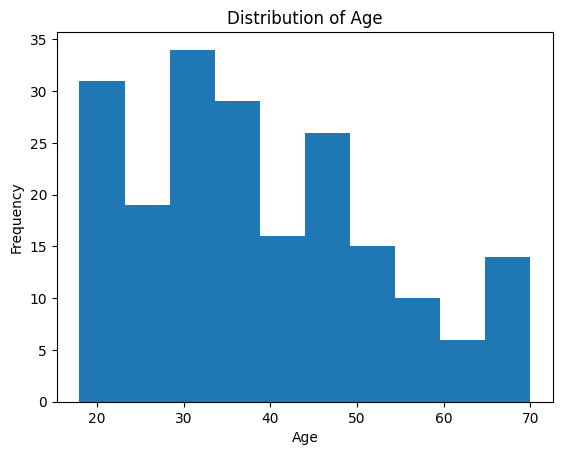

In [ ]:
plt.hist(df['Age'], bins=10)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


**Annual Income distribution**

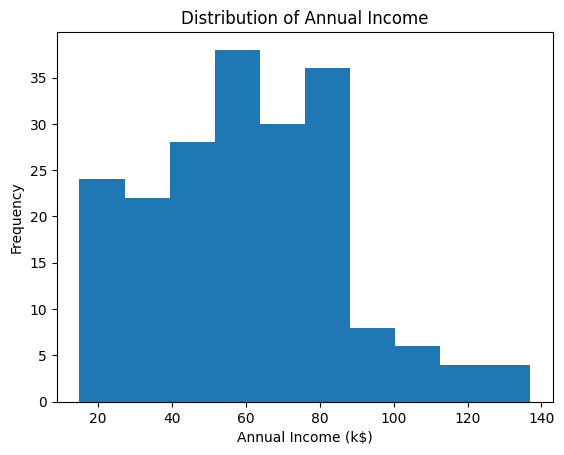

In [ ]:
plt.hist(df['Annual Income (k$)'], bins=10)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()


**Spending Score distribution**

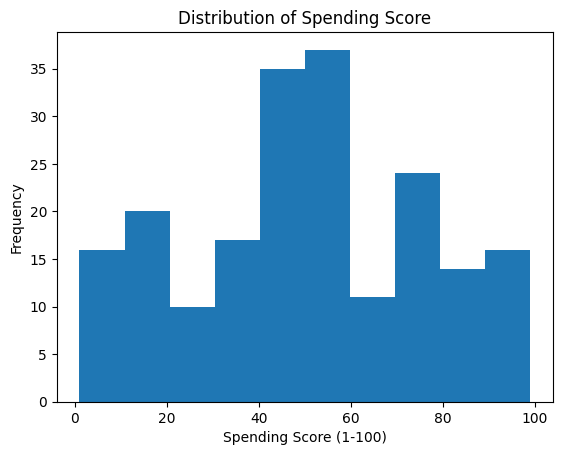

In [ ]:
plt.hist(df['Spending Score (1-100)'], bins=10)
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.show()


**Age vs Annual Income**

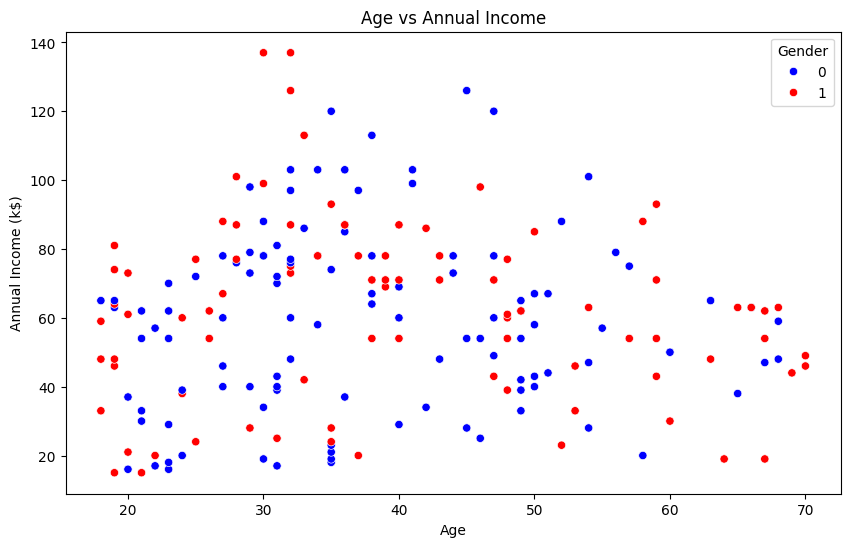

In [ ]:
custom_palette = {0: 'blue', 1: 'red'}
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)', hue='Gender', palette=custom_palette)
plt.title('Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()


**Annual Income vs Spending Score**

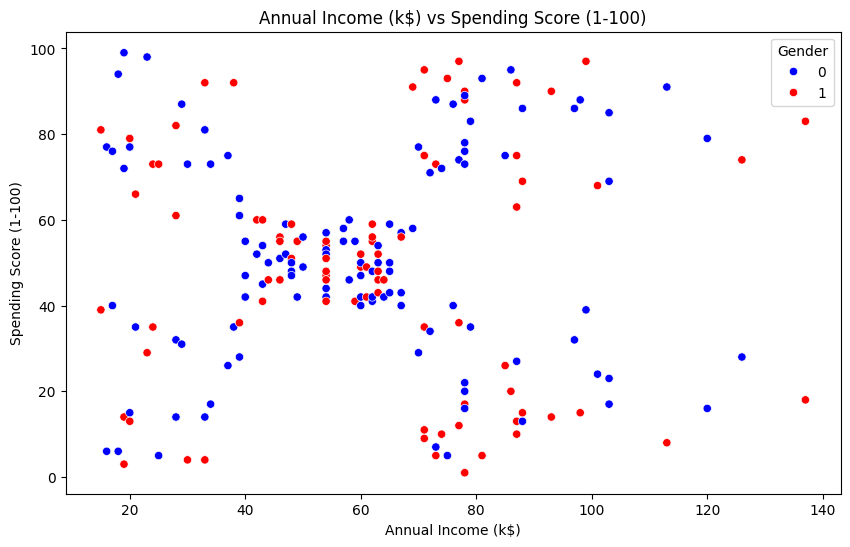

In [ ]:
custom_palette = {0: 'blue', 1: 'red'}
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', palette=custom_palette)
plt.title('Annual Income (k$) vs Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


**Annual Income by Gender**

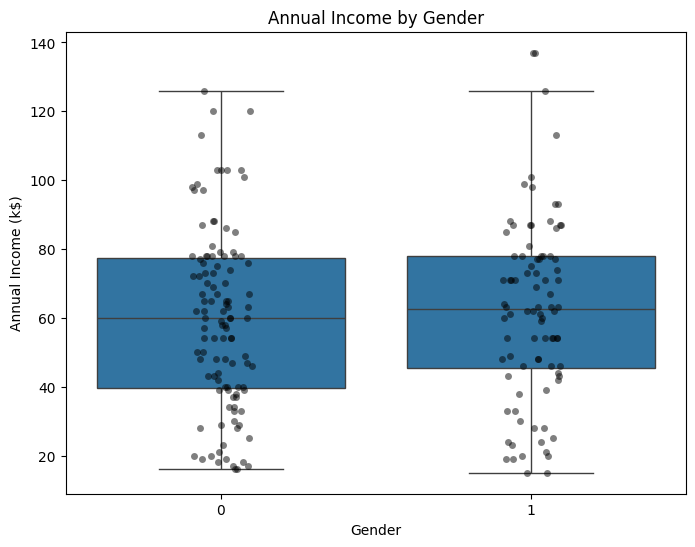

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df, showfliers=False)
sns.stripplot(x='Gender', y='Annual Income (k$)', data=df, color='black', alpha=0.5)
plt.title('Annual Income by Gender')
plt.show()

**Spending Score by Gender**

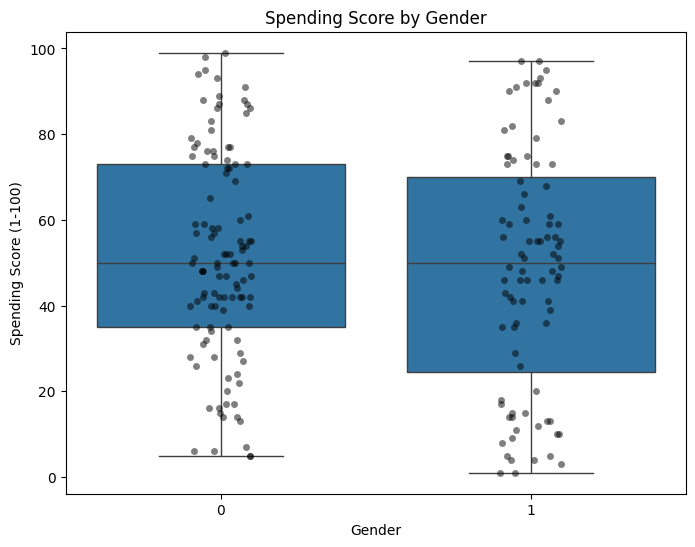

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df)
plt.title('Spending Score by Gender')

# Then, overlay a strip plot to show individual data points
sns.stripplot(x='Gender', y='Spending Score (1-100)', data=df, color='black', alpha=0.5)

# Show plot
plt.show()

**Convert Gender into categorical numerical values**

In [ ]:
!pip install scikit-learn
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

**Feature selection**

In [ ]:
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]
print(features)
k_values = range(1, 11)
inertia_values = []

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


**Function to calculate inertia for different k values**

In [ ]:
def calculate_inertia(k):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=100, random_state=42)
    kmeans.fit(features)
    return kmeans.inertia_

**Calculate inertia for each k**

In [ ]:
inertia_values = [calculate_inertia(k) for k in k_values]
print(inertia_values)

[269981.28, 181363.59595959593, 106348.37306211122, 73679.78903948836, 44448.4554479337, 37233.814510710006, 30227.606513152008, 24986.52564064288, 21806.81299869546, 19641.456216651564]


**Plot elbow method to determine optimal k**

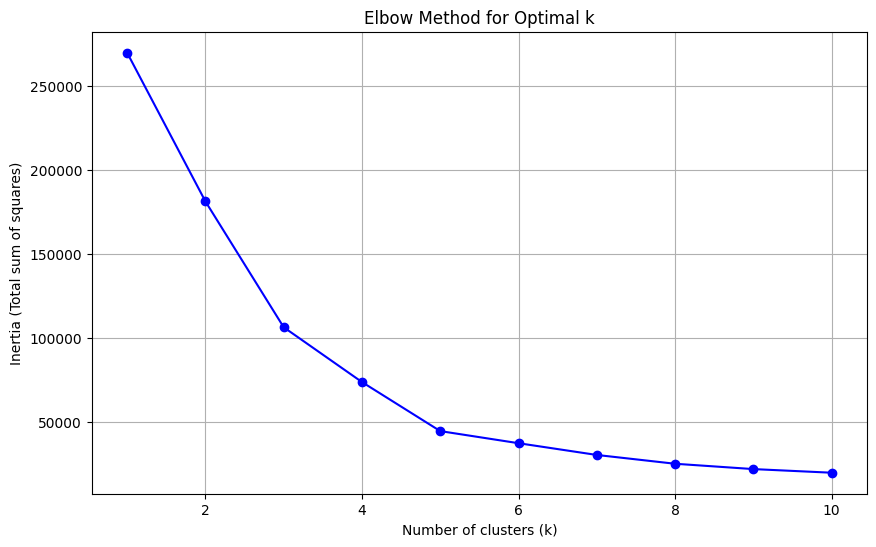

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Total sum of squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

**Fit k-means with optimal k=5**

In [ ]:
k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=100, random_state=42)
kmeans.fit(features)

KMeans(max_iter=100, n_clusters=5, n_init=100, random_state=42)

**Training the K-Means Clustering Model**

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++')
label = kmeans.fit_predict(features)
print(label)

[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 1 0 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 4 2 4 1 4 2 4 2 4 1 4 2 4 2 4 2 4 2 4 1 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



**Checking the centers of out clusters (Also known as Centroids)**


In [ ]:
print(kmeans.cluster_centers_)

[[26.30434783 20.91304348]
 [55.2962963  49.51851852]
 [88.2        17.11428571]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]]


**Plot using seaborn for better visualization**

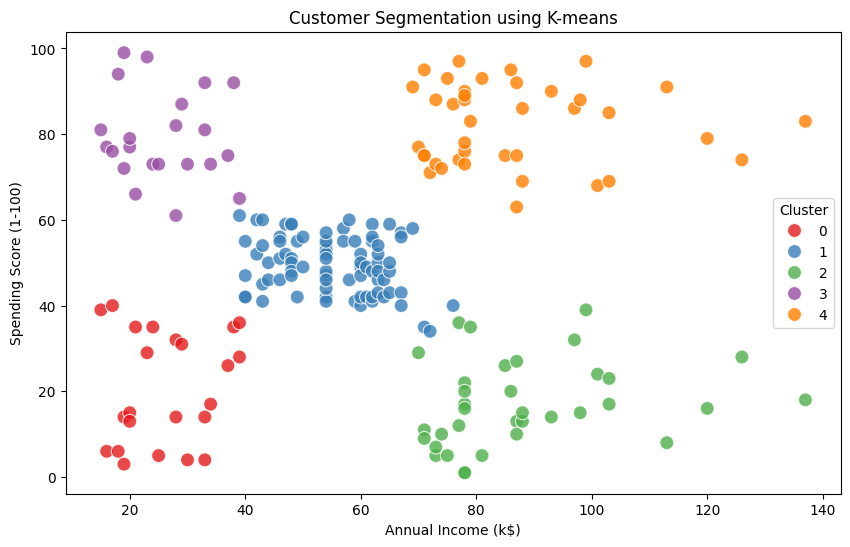

In [ ]:
df['Cluster'] = label

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1', s=100, alpha=0.8)
plt.title('Customer Segmentation using K-means')
plt.legend(title='Cluster')
plt.show()